<a href="https://colab.research.google.com/github/dhruvk98/Machine-Learning-Projects/blob/master/adult_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Binary Classification Problem
# importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# dataset taken from https://www.kaggle.com/wenruliu/adult-income-dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# uploading csv file and creating dataframe
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv


In [0]:
df=pd.read_csv('adult.csv',sep=',',encoding='utf-8')

In [5]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [6]:
df.shape

(48842, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.columns=['age','workclass','fweight','education','education_num','mstatus','occupation','relationship',
            'race','sex','capital_gain','capital_loss','hours_per_week','country','income']
# replacing ? with NaN values and dropping those rows
df.replace('?',np.NaN,inplace=True)
print(df.shape)

   age         workclass  fweight  ... hours_per_week        country income
0   25           Private   226802  ...             40  United-States  <=50K
1   38           Private    89814  ...             50  United-States  <=50K
2   28         Local-gov   336951  ...             40  United-States   >50K
3   44           Private   160323  ...             40  United-States   >50K
4   18               NaN   103497  ...             30  United-States  <=50K
5   34           Private   198693  ...             30  United-States  <=50K
6   29               NaN   227026  ...             40  United-States  <=50K
7   63  Self-emp-not-inc   104626  ...             32  United-States   >50K
8   24           Private   369667  ...             40  United-States  <=50K
9   55           Private   104996  ...             10  United-States  <=50K

[10 rows x 15 columns]
(48842, 15)


Pearson's Correlation matrix between attributes

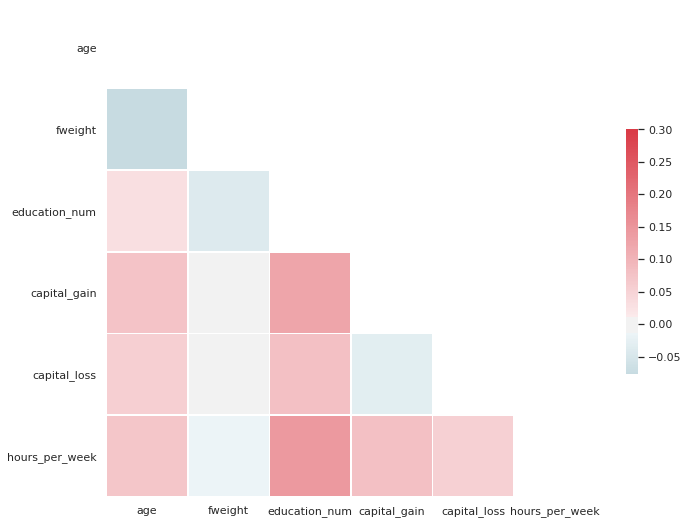

In [87]:
sns.set(style='white' ,context='notebook', palette='deep')
sns.set_palette("Set1", 8, .75)
# correlation matrix between attributes
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmp = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, center=0, cmap=cmp, mask=mask,vmax=0.3, square=True,
            linewidths=.5,cbar_kws={"shrink": .5})

The following graph gives us a distribution of how many male and female instances are present in our income class. 

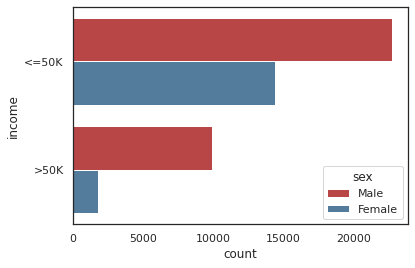

In [88]:
sns.countplot(y='income',hue='sex',data=df)

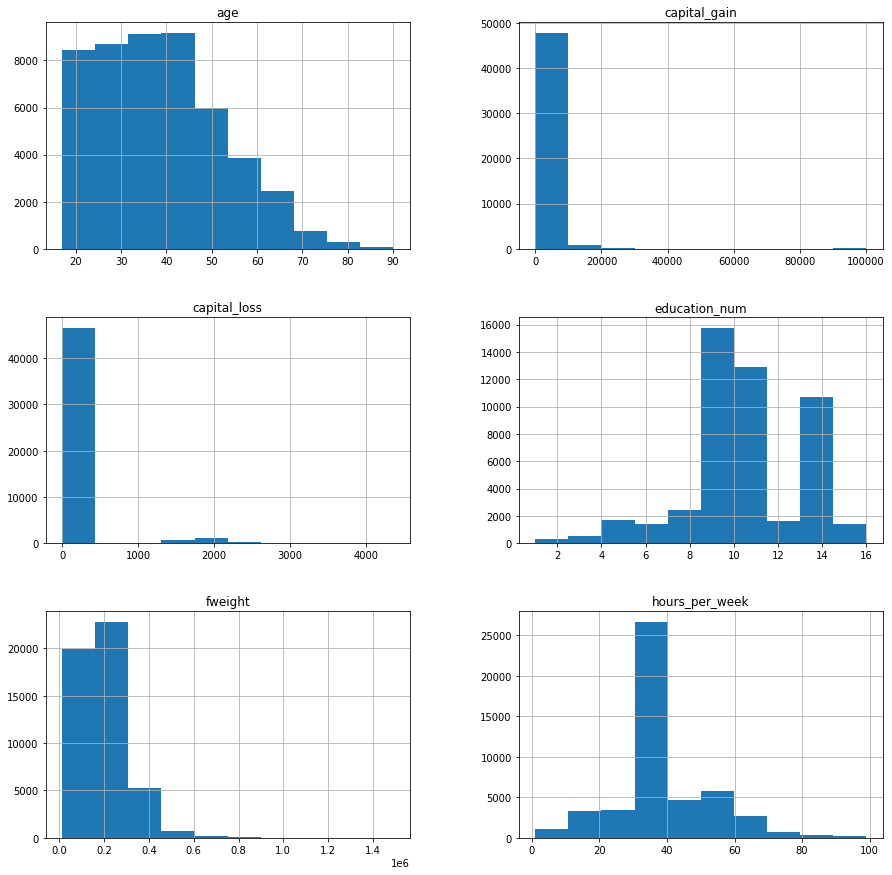

In [19]:
# visualizing numerical attributes of our dataset
df.hist(bins=10,figsize=(15,15))
plt.show()

In [0]:
# handling missing values
df = df[df.country!='Holand-Netherlands'] # dropping because there's only one instance of this country

In [21]:
df_new = df.dropna()
print(df_new.shape)

(45221, 15)


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45221 non-null  int64 
 1   workclass       45221 non-null  object
 2   fweight         45221 non-null  int64 
 3   education       45221 non-null  object
 4   education_num   45221 non-null  int64 
 5   mstatus         45221 non-null  object
 6   occupation      45221 non-null  object
 7   relationship    45221 non-null  object
 8   race            45221 non-null  object
 9   sex             45221 non-null  object
 10  capital_gain    45221 non-null  int64 
 11  capital_loss    45221 non-null  int64 
 12  hours_per_week  45221 non-null  int64 
 13  country         45221 non-null  object
 14  income          45221 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [0]:
# using a column transformer to alter data in our columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

numerical_ix = [0,2,4,10,11,12] # df.select_dtypes(include=['int64']).columns
categorical_ix =   [1,3,5,6,7,8,9,13] # df.select_dtypes(include=['object']).columns
t = [('cat', OrdinalEncoder(), categorical_ix), ('num', StandardScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)

In [25]:
# separate dependent and independent variables
y=df_new.income
X=df_new.drop('income',axis=1)
print(X.shape)
print(y.shape)

(45221, 14)
(45221,)


In [27]:
# To understand how the column transformer works
X_ran = col_transform.fit_transform(X) #.toarray()
X_ran[:5]

array([[ 2.        ,  1.        ,  4.        ,  6.        ,  3.        ,
         2.        ,  1.        , 37.        , -1.02498531,  0.35086076,
        -1.22154636, -0.14673486, -0.21872833, -0.07812093],
       [ 2.        , 11.        ,  2.        ,  4.        ,  0.        ,
         4.        ,  1.        , 37.        , -0.04146565, -0.94592643,
        -0.4381178 , -0.14673486, -0.21872833,  0.75469138],
       [ 1.        ,  7.        ,  2.        , 10.        ,  0.        ,
         4.        ,  1.        , 37.        , -0.79801924,  1.39357847,
         0.73702505, -0.14673486, -0.21872833, -0.07812093],
       [ 2.        , 15.        ,  2.        ,  6.        ,  0.        ,
         2.        ,  1.        , 37.        ,  0.4124665 , -0.27845798,
        -0.04640352,  0.87745397, -0.21872833, -0.07812093],
       [ 2.        ,  0.        ,  4.        ,  7.        ,  1.        ,
         4.        ,  1.        , 37.        , -0.34408708,  0.08476891,
        -1.61326064, -0.14

In [0]:
# try multiple classification algos 
from sklearn.linear_model import LogisticRegression as lr
model = lr()

from sklearn.neighbors import KNeighborsClassifier as knn
model_knn = knn(n_neighbors=5)

from sklearn.ensemble import RandomForestClassifier as rfc
model_rf = rfc(max_features=8,n_estimators=189)

In [0]:
# change value of m according to classifier
# using a pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model_rf)],verbose=True)

In [51]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


In [52]:
print(scores)

[0.85848535 0.85603715 0.8479655  0.85283061 0.85150376]


In [53]:
print(np.mean(scores)) 
# 0.848 for KFold + Logistic Regression + Ohe
# 0.828 for KFold + KNN + Ohe
# 0.850 for KFold + Random Forest + Ohe
# 0.820 for KFold + Logistic Regression + OrdinalEncoder
# 0.824 for KFold + KNN + OrdinalEncoder
# 0.853 for KFold + Random Forest + OrdinalEncoder

0.8533644740081595


In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=10),
    }

rnd_search = RandomizedSearchCV(model_rf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_ran,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [36]:
rnd_search.best_params_

{'max_features': 8, 'n_estimators': 189}

In [37]:
rnd_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=189,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rnd_search.best_score_

0.8536078905682899

In [39]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8533425848300393 {'max_features': 7, 'n_estimators': 180}
0.8536078905682899 {'max_features': 8, 'n_estimators': 189}
0.8526791615659967 {'max_features': 5, 'n_estimators': 103}
0.8533425261524702 {'max_features': 3, 'n_estimators': 75}
0.8526128094599976 {'max_features': 8, 'n_estimators': 117}
0.8522147628362683 {'max_features': 4, 'n_estimators': 104}
0.8520378304066674 {'max_features': 8, 'n_estimators': 131}
0.8506668143385484 {'max_features': 6, 'n_estimators': 53}
0.8514628904717163 {'max_features': 2, 'n_estimators': 88}
0.8534752988216322 {'max_features': 6, 'n_estimators': 130}
